# Lab 6 – Publish a model Starter

Here is what we will do:
1. Build a pipeline for the Howell height predicts weight
2. Save the model to memory
3. Read in the model into a separate notebook
4. Use the model to creat a server
5. Show th


### Prepare the data

### Read the CSV file:
We will use info() on the data frame to get a first look.  This is mostly a quick sanity check

We are going to let the pipeline create the new features so all input  from 
train, test or prediction goes through the same process.  We leave the functions so they are
available if we need them later.

In [6]:
# third cell -
import pandas as pd
import numpy as np
howell_full = pd.read_csv("Howell.csv", sep=";")


FileNotFoundError: [Errno 2] No such file or directory: 'Howell.csv'

### A Better Plot

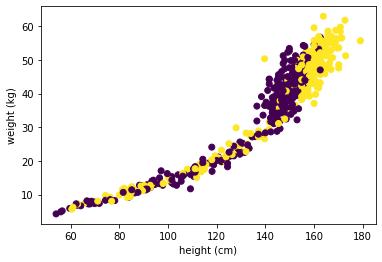

In [3]:
import matplotlib.pyplot as plt
height = howell_full['height']
weight = howell_full['weight']

#plt.scatter(height, weight)
#plt.xlabel('height (cm)')
#plt.ylabel('weight (kg)')
#plt.show()

gender = howell_full['male']
plt.scatter(height, weight, c=gender)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.show()

age = howell_full['age']
#plt.scatter(age, height, c=gender)
#plt.xlabel('age (years)')
#plt.ylabel('height (cm)')
#plt.show()




### Train/Test Data Split

In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(howell_full, 
                        test_size=0.2, random_state=123)
print('Train size: ', len(train_set), 'Test size: ', len(test_set))





Train size:  435 Test size:  109


### Train and Evaluate a Linear Regression Model

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = train_set[['height']]
y = train_set['weight']

X_test = test_set[['height']]
y_test = test_set['weight']

lr_model = LinearRegression()
lr_model.fit(X,y)

y_pred = lr_model.predict(X)
print('Results for linear regression on training data')
print('  Default settings')
print('Internal parameters:')
print('   Bias is ', lr_model.intercept_)
print('   Coefficients', lr_model.coef_)
print('   Score', lr_model.score(X,y))

print('MAE is  ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2    ', r2_score(y,y_pred))

y_test_pred = lr_model.predict(X_test)
print()
print('Results for linear regression on test data')

print('MAE is  ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test,y_test_pred))


Results for linear regression on training data
  Default settings
Internal parameters:
   Bias is  -34.33484184267892
   Coefficients [0.50625269]
   Score 0.8892970528522413
MAE is   3.9868013743337323
RMSE is  4.901419255121661
MSE is  24.023910714477378
R^2     0.8892970528522413

Results for linear regression on test data
MAE is   4.268058841968444
RMSE is  5.308233145876227
MSE is  28.177339130979025
R^2     0.8677460846087206


### Plot linear regression model
 Using height to predict weight 

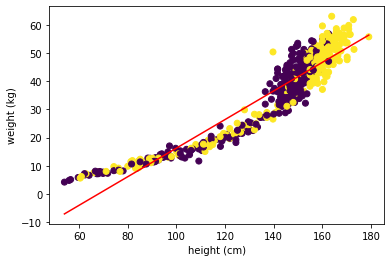

In [30]:
import matplotlib.pyplot as plt
height = howell_full['height']
weight = howell_full['weight']
gender = howell_full['male']
age = howell_full['age']

min_height = height.min()
max_height = height.max()
points = 200
step_by = (max_height - min_height)/(points-1)
x_values = [min_height + i*step_by for i in range(0, points)]
inputs = [[x] for x in x_values]
y_values = lr_model.predict(inputs)

plt.scatter(height, weight, c=gender)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')

plt.plot(x_values, y_values,c='red')
plt.show()




# Results
Basic results for our regression models to predict weight on the Howell data.

| Model | Training Features | RMSE train | R2 train | RMSE test | R2 test |
|:---|:---|:---|:---|:---|:---|
|Linear Regression|Weight|4.90|88.93|4.27|86.77|




# Build a pipeline

In [2]:
import numpy as np  # Import numpy
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression

# Define pipeline components
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')  # Handle missing values
poly4 = PolynomialFeatures(degree=4, include_bias=False)  # Generate polynomial features
scale = StandardScaler()  # Normalize input features
lr_model = LinearRegression()  # Linear regression model

# Create the pipeline
stages = [
    ('imp_mean', imp_mean),
    ('poly4', poly4),
    ('scale', scale),
    ('lr_model', lr_model),
]

pipe_model = Pipeline(stages)



# Train the Pipeline

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your dataset and 'target_column' is the column you're predicting
X = df.drop(columns=['weight'])  # Replace 'weight' with your actual target column
y = df['weight']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
pipe_model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Fit the pipeline on the training data
pipe_model.fit(X_train, y_train)

# Training predictions and evaluation
y_pred = pipe_model.predict(X_train)
print('Results for pipeline linear regression on training data')
print('Bias is', pipe_model.named_steps['regressor'].intercept_)
print('Coefficients:', pipe_model.named_steps['regressor'].coef_)
print('Training score:', pipe_model.score(X_train, y_train))

# Test predictions and evaluation
y_test_pred = pipe_model.predict(X_test)
print('\nResults for pipeline linear regression on test data')
print('Test score:', pipe_model.score(X_test, y_test))


Results for pipeline linear regression on training data
Bias is 35.33129464896552
Coefficients: [12.73633008  1.2944897   0.37371793]
Training score: 0.885236546116295

Results for pipeline linear regression on test data
Test score: 0.897911290390431


In [25]:
import pandas as pd

# Load the dataset with the correct delimiter (semicolon)
df = pd.read_csv('C:/RaginiWorkArea/applied-ml-rsin/applied-ml-rsin/lab06/Howell.csv', delimiter=';')

# Check the first few rows to verify the data
print(df.head())


    height     weight   age  male
0  151.765  47.825606  63.0     1
1  139.700  36.485807  63.0     0
2  136.525  31.864838  65.0     0
3  156.845  53.041914  41.0     1
4  145.415  41.276872  51.0     0


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your dataset and 'weight' is the target column
df = pd.read_csv('C:/RaginiWorkArea/applied-ml-rsin/applied-ml-rsin/lab06/Howell.csv', delimiter=";")  # Adjust delimiter

# Separate the features (X) and target (y)
X = df.drop(columns=['weight'])  # Replace 'weight' with your actual target column
y = df['weight']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
pipe_model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Fit the pipeline on the training data
pipe_model.fit(X_train, y_train)

# Get results
bias = pipe_model.named_steps['regressor'].intercept_
coefficients = pipe_model.named_steps['regressor'].coef_
train_score = pipe_model.score(X_train, y_train)
test_score = pipe_model.score(X_test, y_test)

# Check if the results DataFrame is empty or not and create it if it is empty
if 'results_df' not in locals():
    results_df = pd.DataFrame(columns=["Model", "Bias", "Coefficients", "Training Score", "Test Score"])

# Create a new row as a DataFrame with the correct column names
new_row = pd.DataFrame([{
    "Model": "Linear Regression",
    "Bias": bias,
    "Coefficients": coefficients.tolist(),  # Convert numpy array to list for better readability
    "Training Score": train_score,
    "Test Score": test_score
}], columns=["Model", "Bias", "Coefficients", "Training Score", "Test Score"])

# Concatenate the new row with the existing DataFrame
results_df = pd.concat([results_df, new_row], ignore_index=True, sort=False)

# Print the results table
print(results_df)


               Model       Bias  \
0  Linear Regression  35.331295   
1  Linear Regression  35.331295   

                                        Coefficients  Training Score  \
0  [12.736330078266501, 1.2944896975346192, 0.373...        0.885237   
1  [12.736330078266501, 1.2944896975346192, 0.373...        0.885237   

   Test Score  
0    0.897911  
1    0.897911  


# Graph the Polynomial Curve

c:\Users\ragin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


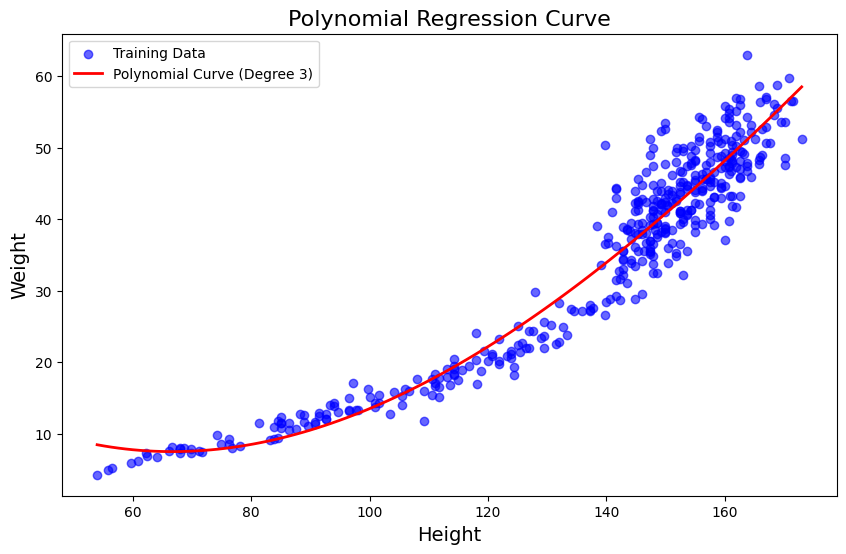

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

# Define the degree of the polynomial curve
degree = 3  # You can change this to any degree

# Generate polynomial features for the input data (X)
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X_train[['height']])  # Replace 'height' with the relevant feature

# Train the pipeline model with polynomial features
pipe_model.fit(X_poly, y_train)

# Generate the input values for predictions
input_range = np.linspace(X_train[['height']].min(), X_train[['height']].max(), 100).reshape(-1, 1)
input_poly = poly.transform(input_range)

# Predict the corresponding y values using the pipeline model
y_values = pipe_model.predict(input_poly)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.scatter(X_train[['height']], y_train, color='blue', label='Training Data', alpha=0.6)
plt.plot(input_range, y_values, color='red', label=f'Polynomial Curve (Degree {degree})', linewidth=2)
plt.title("Polynomial Regression Curve", fontsize=16)
plt.xlabel("Height", fontsize=14)
plt.ylabel("Weight", fontsize=14)
plt.legend()
plt.show()


----------------------------------------------------------------------
Model                Training Features    RMSE train R2 train   RMSE test  R2 test   
Polynomial (Degree 3) Height               4.04       0.92       3.43       0.95      
----------------------------------------------------------------------


c:\Users\ragin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


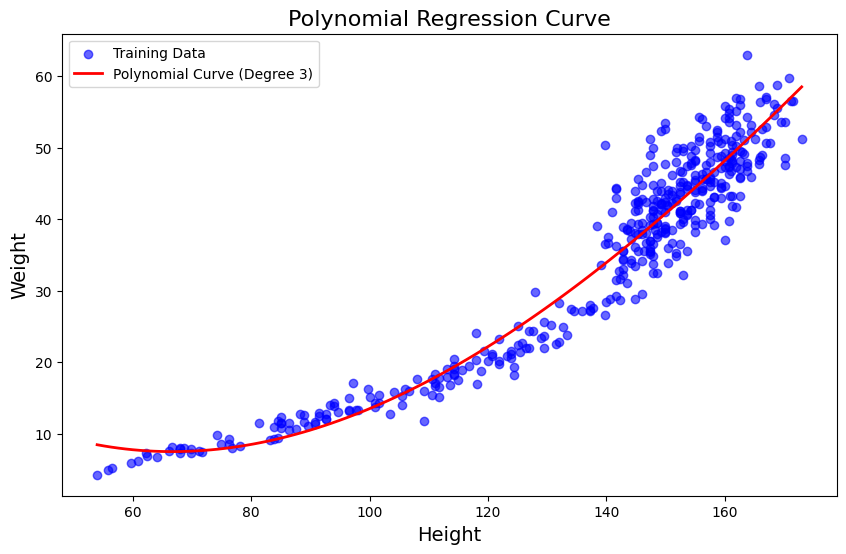

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have X_train, y_train, X_test, and y_test defined

# Define the degree of the polynomial curve
degree = 3

# Generate polynomial features for the input data (X)
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train[['height']])
X_test_poly = poly.transform(X_test[['height']])

# Train the pipeline model with polynomial features
pipe_model.fit(X_train_poly, y_train)

# Predict on training and test sets
y_train_pred = pipe_model.predict(X_train_poly)
y_test_pred = pipe_model.predict(X_test_poly)

# Calculate RMSE and R2 for training set
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# Calculate RMSE and R2 for test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

# Create the table as a list of lists
table_data = [
    ["Model", "Training Features", "RMSE train", "R2 train", "RMSE test", "R2 test"],
    [f"Polynomial (Degree {degree})", "Height", f"{rmse_train:.2f}", f"{r2_train:.2f}", f"{rmse_test:.2f}", f"{r2_test:.2f}"]
]

# Print the table with proper formatting
print("-" * 70)
for row in table_data:
    print("{:<20} {:<20} {:<10} {:<10} {:<10} {:<10}".format(*row))
print("-" * 70)

# Plot the graph (same as before)
plt.figure(figsize=(10, 6))
plt.scatter(X_train[['height']], y_train, color='blue', label='Training Data', alpha=0.6)
input_range = np.linspace(X_train[['height']].min(), X_train[['height']].max(), 100).reshape(-1, 1)
input_poly = poly.transform(input_range)
y_values = pipe_model.predict(input_poly)
plt.plot(input_range, y_values, color='red', label=f'Polynomial Curve (Degree {degree})', linewidth=2)
plt.title("Polynomial Regression Curve", fontsize=16)
plt.xlabel("Height", fontsize=14)
plt.ylabel("Weight", fontsize=14)
plt.legend()
plt.show()

# Prediction

In [33]:
# Ensure that we reshape the heights to match the input shape the model expects
heights = [[0], [50], [100], [150], [175], [200]]  # Example heights

# Create a DataFrame from the heights with the same structure as X_train (including all columns)
# For simplicity, we'll assume only the 'height' feature is being passed (other features are zero for this demo)
heights_df = pd.DataFrame(heights, columns=['height'])

# Make sure other features are added to the DataFrame with placeholder values (e.g., zeros or mean values)
# If you have more features, add them here. For this example, we assume there are 4 features.
# Use the mean of the training set or any other appropriate placeholder value for missing features.
for column in X_train.columns:
    if column not in heights_df.columns:
        heights_df[column] = 0  # or use X_train[column].mean() as placeholder

# Ensure the features match the format expected by the pipeline (same as training data)
heights_poly = poly.transform(heights_df[['height']])

# Use the trained pipeline model to predict the weights for these heights
predicted_weights = pipe_model.predict(heights_poly)

# Print the input heights and the predicted weights
print("Input Heights: ", heights)
print("Predicted Weights: ", predicted_weights)


Input Heights:  [[0], [50], [100], [150], [175], [200]]
Predicted Weights:  [36.92370727  9.15439499 13.49268632 40.77016379 60.14596685 81.81840989]


In [45]:
import pickle

# Load the model from the .sav file
with open('finalized_model.sav', 'rb') as file:
    loaded_model = pickle.load(file)

# Print the named steps
print(loaded_model.named_steps)

{'scaler': StandardScaler(), 'regressor': LinearRegression()}


In [69]:
import pickle

# Define the filename to save the model
filename = 'finalized_model.sav'

# Open the file in binary write mode ('wb') and use pickle.dump to save the model
with open(filename, 'wb') as file:
    pickle.dump(pipe_model, file)

print(f'Model saved as {filename}')


Model saved as finalized_model.sav


Input Heights:  [[0], [50], [100], [150], [175], [200]]
Predicted Weights:  [-34.33484184  -9.02220726  16.29042732  41.6030619   54.25937919
  66.91569648]


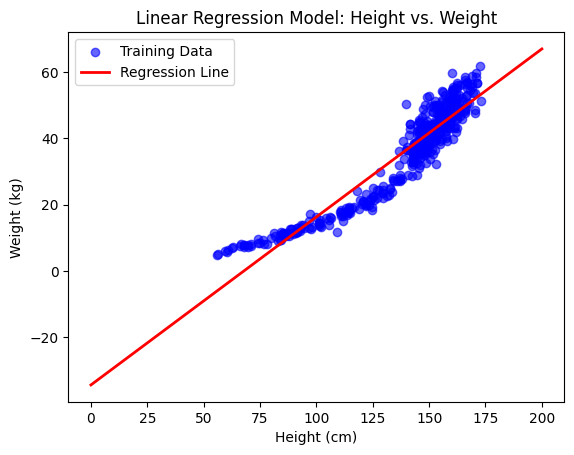

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define heights to check
heights = [[0], [50], [100], [150], [175], [200]]

# Convert to DataFrame to match training format
heights_df = pd.DataFrame(heights, columns=['height'])

# Predict weights using the trained pipeline model
predicted_weights = pipe_model.predict(heights_df)

# Print the input heights and the predicted weights
print("Input Heights: ", heights)
print("Predicted Weights: ", predicted_weights)

# Plot the linear regression model
plt.scatter(X_train['height'], y_train, color='blue', label='Training Data', alpha=0.6)
plt.plot(heights, predicted_weights, color='red', label='Regression Line', linewidth=2)
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Linear Regression Model: Height vs. Weight")
plt.legend()
plt.show()


# Pickle

Input Heights:  [[0], [50], [100], [150], [175], [200]]
Predicted Weights:  [-34.33484184  -9.02220726  16.29042732  41.6030619   54.25937919
  66.91569648]


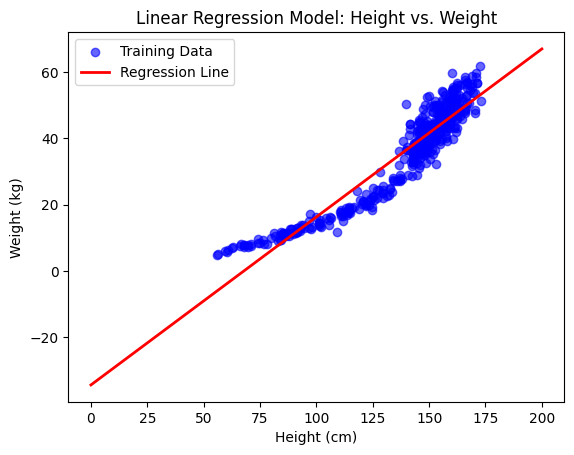

Model saved as finalized_model.sav


In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

# Define heights to check
heights = [[0], [50], [100], [150], [175], [200]]

# Convert to DataFrame to match training format
heights_df = pd.DataFrame(heights, columns=['height'])

# Predict weights using the trained pipeline model
predicted_weights = pipe_model.predict(heights_df)

# Print the input heights and the predicted weights
print("Input Heights: ", heights)
print("Predicted Weights: ", predicted_weights)

# Plot the linear regression model
plt.scatter(X_train['height'], y_train, color='blue', label='Training Data', alpha=0.6)
plt.plot(heights, predicted_weights, color='red', label='Regression Line', linewidth=2)
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Linear Regression Model: Height vs. Weight")
plt.legend()
plt.show()

# Save the model to disk
filename = 'finalized_model.sav'
pickle.dump(pipe_model, open(filename, 'wb'))

print(f'Model saved as {filename}')


In [74]:
import pandas as pd

# Convert heights list to DataFrame with the correct column name
heights_df = pd.DataFrame(heights, columns=['height'])

# Make predictions
predicted_weights = loaded_model.predict(heights_df)

print("Input Heights: ", heights)
print("Predicted Weights: ", predicted_weights)


Input Heights:  [[0], [50], [100], [150], [175], [200]]
Predicted Weights:  [-34.33484184  -9.02220726  16.29042732  41.6030619   54.25937919
  66.91569648]


In [76]:
import pickle

# Define the filename
filename = 'finalized_model.sav'

# Load the model from the file
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

print("Model successfully loaded!")


Model successfully loaded!


In [77]:
import pandas as pd

# Heights to predict
heights = [[0], [50], [100], [150], [175], [200]]

# Convert to DataFrame with correct column name
heights_df = pd.DataFrame(heights, columns=['height'])

# Predict weights using the restored model
predicted_weights = loaded_model.predict(heights_df)

print("Input Heights: ", heights)
print("Predicted Weights: ", predicted_weights)


Input Heights:  [[0], [50], [100], [150], [175], [200]]
Predicted Weights:  [-34.33484184  -9.02220726  16.29042732  41.6030619   54.25937919
  66.91569648]


In [78]:
import pickle

filename = 'finalized_model.sav'
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)


In [79]:
import pandas as pd
heights_df = pd.DataFrame(heights, columns=['height'])
predicted_weights = loaded_model.predict(heights_df)


In [80]:
import pickle

# Load the saved model
filename = 'finalized_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# Heights to check
heights = [[0], [50], [100], [150], [175], [200]]

# Ensure the heights are in the correct format (DataFrame with column names)
import pandas as pd
heights_df = pd.DataFrame(heights, columns=['height'])

# Make predictions using the loaded model
predicted_weights = loaded_model.predict(heights_df)

# Print results
print('Input heights: ', heights)
print('Predicted weights are: ', predicted_weights)


Input heights:  [[0], [50], [100], [150], [175], [200]]
Predicted weights are:  [-34.33484184  -9.02220726  16.29042732  41.6030619   54.25937919
  66.91569648]
